## Exercise 7 -- Bayesian inference and Data assimilation

**Group : Duckies [`Md. Niaz Morshed`, `Mohammad Hasan`, `Jayed Akbar Sumon`, `Shahriar Shohid Choudhury`]** 

**1. Suppose the weather today is sunny. What is the probability that it will be sunny, overcast or rainy on the day after tomorrow?**

*To find the probability of the weather on the day after tomorrow given that today is sunny, we can use the transition matrix P. The probability of the weather on the day after tomorrow is given by the product of the initial state vector and the transition matrix squared. The initial state vector for today being sunny is [1, 0, 0]. So, we have:*

$$
\begin{pmatrix} 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & \frac{1}{4} & \frac{1}{5} \\
\frac{1}{3} & \frac{1}{2} & \frac{2}{5} \\
\frac{1}{6} & \frac{1}{4} & \frac{2}{5}
\end{pmatrix}^2
=
\begin{pmatrix} 1 & 0 & 0 \end{pmatrix}
\begin{pmatrix}
\frac{11}{30} & \frac{3}{10} & \frac{7}{25} \\
\frac{2}{5} & \frac{13}{30} & \frac{32}{75} \\
\frac{7}{30} & \frac{4}{15} & \frac{22}{75}
\end{pmatrix}
=
\begin{pmatrix}
\frac{11}{30} & \frac{3}{10} & \frac{7}{25}
\end{pmatrix}
$$

*Thus, given that today is sunny, the probability that it will be sunny on the day after tomorrow is $\frac{11}{30}$, the probability that it will be overcast is $\frac{3}{10}$ and the probability that it will be rainy is $\frac{7}{25}$*

**2. Find the invariant measure of the Markov process. That is, solve for a probability vector $p$ such that $p = Pp$**

*An invariant measure of a Markov process is a probability vector $p$ such that $p = Pp$, where $P$ is the transition matrix of the Markov process. In other words, the invariant measure is a stationary distribution of the Markov chain.*

*To find the invariant measure for this Markov process, we need to solve the system of linear equations given by $p = Pp$. We also have the additional constraint that the elements of $p$ must sum to 1, since it is a probability vector.*

*The system of linear equations can be solved as follows:*

$$
\begin{pmatrix}
p_1 \\
p_2 \\
p_3
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2} & \frac{1}{3} & \frac{1}{6} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
\frac{1}{5} & \frac{2}{5} & \frac{2}{5}
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2 \\
p_3
\end{pmatrix}
$$

*Here we get the following system of linear equations:*

$$
p₁ = (1/2) . p₁ + (1/4) . p₂ + (1/5) . p₃ \\
p₂ = (1/3) . p₁ + (1/2) . p₂ + (2/5) . p₃ \\
p₃ = (1/6) . p₁ + (1/4) . p₂ + (2/5) . p₃
$$
*Rearranging these equations, we get:*
$$
(1/2 - 1) . p₁ + (1/4) . p₂ + (1/5) . p₃ = 0 \\
(1/3) . p₁ + (1/2 - 1) . p₂ + (2/5) . p₃ = 0 \\
(1/6) . p₁ + (1/4) . p₂ + (2/5 - 1) . p₃ = 0
$$
*Simplifying further:*
$$
(-1/2) . p₁ + (1/4) . p₂ + (1/5) . p₃ = 0 \\
(1/3) . p₁ - (1/2) . p₂ + (2/5) . p₃ = 0 \\
(1/6) . p₁ + (1/4) . p₂ - (3/5) . p₃ = 0
$$
*Solving this system of equations, we find that the solution is given by $p_1 = \frac{6}{19}$, $p_2 = \frac{8}{19}$ and $p_3 = \frac{5}{19}$.*

*Thus, the invariant measure of this Markov process is given by the probability vector $p = \begin{pmatrix} \frac{6}{19} \\ \frac{8}{19} \\ \frac{5}{19} \end{pmatrix}$.*

**3. Implement the Markov chain. Suppose at day 1, the weather is sunny. Run 190 parallel
simulation. Plot the histograms at day 2, 3 and 30 of each weather condition over all
samples. Compare them with the invariant measure you have found in step 2**

Here we are implementing markov chain for 190 simulations and we use the transpose of transition matrix as next state is on axis 1.

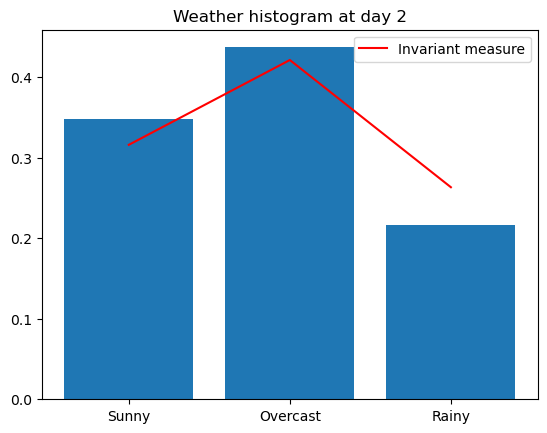

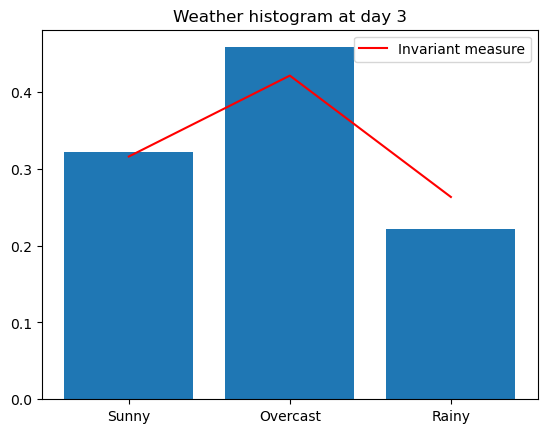

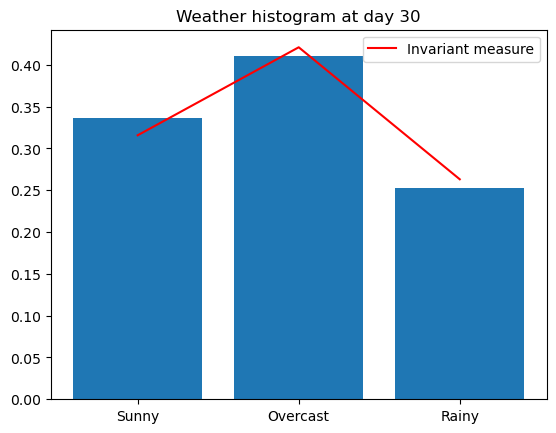

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Setting random seed
np.random.seed(9)

# Transition matrix
P = np.array([[1/2, 1/4, 1/5],
              [1/3, 1/2, 2/5],
              [1/6, 1/4, 2/5]])

# Invariant measure
p = np.array([6/19, 8/19, 5/19])

# Number of simulations
n_simulations = 190

# Number of days
n_days = 30

# Initial state (sunny)
state = np.zeros(n_simulations, dtype=int)

# State counts
state_counts = np.zeros((n_days + 1, 3))

# Count initial state
state_counts[0] = np.bincount(state, minlength=3)

# Run simulations
for day in range(1, n_days + 1):
    # Transition to next state
    state = np.array([np.random.choice(3, p=P.T[s]) for s in state])
    
    # Count states
    state_counts[day] = np.bincount(state, minlength=3)

# Plot histograms
days_to_plot = [2, 3, 30]
for day in days_to_plot:
    plt.figure()
    plt.bar(["Sunny", "Overcast", "Rainy"], state_counts[day] / n_simulations)
    plt.plot(["Sunny", "Overcast", "Rainy"], p, 'r', label="Invariant measure")
    plt.title(f"Weather histogram at day {day}")
    plt.legend()
    plt.show()


**4. Does it seem to converge to the invariant measure? Analytically show that the chain
converges to the invariant measure**

In [2]:
# Find eigenvalues
eigenvalues = np.linalg.eigvals(P)

print(f"Eigen values are : {eigenvalues}")

Eigen values are : [1.         0.28164966 0.11835034]


In [3]:
eignvals, eigenvects = la.eig(P)
for i in range(P.shape[0]):
    print(f"For Eigen value of: {eignvals[i]}")
    print(f"The corresponding Eigen vector is : {eigenvects[i]}")

For Eigen value of: (0.9999999999999998+0j)
The corresponding Eigen vector is : [-0.53665631 -0.80703591  0.21753892]
For Eigen value of: (0.2816496580927728+0j)
The corresponding Eigen vector is : [-0.71554175  0.2961877  -0.79031741]
For Eigen value of: (0.1183503419072274+0j)
The corresponding Eigen vector is : [-0.4472136   0.51084821  0.57277849]


*We have already seen that the invariant measure exist and it is the stationary distribution for $p=Pp$ and we can see that all values of $P$ are strictly positive which proves ergodicity and it has a finite state space, it is postitive recurrent.If a Markov chain is ergodic, then it has a unique stationary distribution (invariant measure) and converges to this distribution regardless of the initial state. In the plot we can also see that the values are approaching to the invariate measure when the days are increasing.  We can say that it will converge to the invariate measure. *

**5. Suppose at day 2, your agent tell you that they cannot see the sun, but do not tell you
whether it is just cloudy or it rains. Using the simulation result from the previous step
and the given information, how would you determine the probability of rain at day 2?**

In [4]:
# Probability of overcast on day 2 given sunny on day 1
p_O2_S1 = state_counts[2, 1] / n_simulations

# Probability of rainy on day 2 given sunny on day 1
p_R2_S1 = state_counts[2, 2] / n_simulations

# Probability of rain on day 2 given no sun
p_R2_no_S2 = p_R2_S1 / (p_O2_S1 + p_R2_S1)

print(f"Probability of rainy weather on day 2 given that the weather is not sunny: {p_R2_no_S2:.4f}")

Probability of rainy weather on day 2 given that the weather is not sunny: 0.3306


**6. Under the same assumption as the previous step, discard all simulated result that says day 2 is sunny, and plot the histogram at day 3 among the remaining. Compare with the result on day 3 from step 4 (without the extra information).**

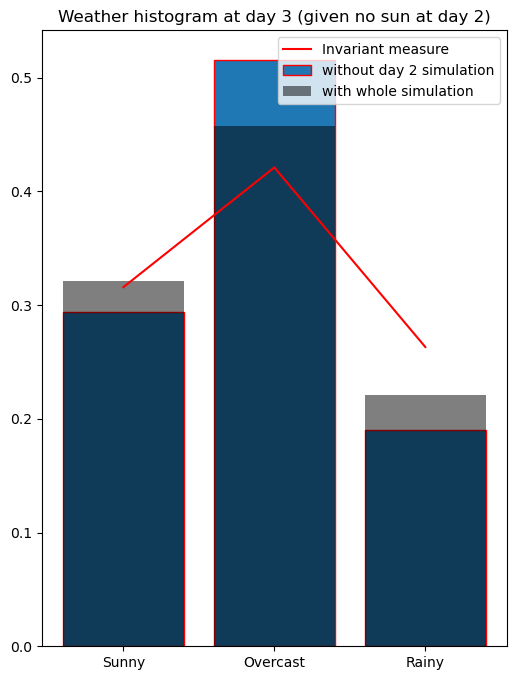

In [5]:
# Discard simulations where day 2 is sunny
remaining_simulations = state != 0

# State counts for remaining simulations
state_counts_remaining = np.zeros((n_days + 1, 3))

# Count initial state for remaining simulations
state_counts_remaining[0] = np.bincount(state[remaining_simulations], minlength=3)

# Run simulations for remaining simulations
for day in range(1, n_days + 1):
    # Transition to next state for remaining simulations
    state[remaining_simulations] = np.array([np.random.choice(3, p=P.T[s]) for s in state[remaining_simulations]])
    
    # Count states for remaining simulations
    state_counts_remaining[day] = np.bincount(state[remaining_simulations], minlength=3)

# Plot histogram for day 3
plt.figure(figsize=(6,8))
plt.bar(["Sunny", "Overcast", "Rainy"], state_counts_remaining[3] / remaining_simulations.sum(),edgecolor = 'red', label = "without day 2 simulation")
plt.bar(["Sunny", "Overcast", "Rainy"], state_counts[3] / n_simulations,color='k', alpha = 0.5, label = "with whole simulation")
plt.plot(["Sunny", "Overcast", "Rainy"], p, 'r', label="Invariant measure")
plt.title(f"Weather histogram at day 3 (given no sun at day 2)")
plt.legend()
plt.show()

**7. It turns out that your agent has very unstable mind, so the information from them is only trustworthy with probability 1/2. Otherwise, the agent is completely trolling and the information has NO USE. Use your simulation result to forecast the weather in day 3, while considering both cases when the information is true and when it should be ignored.**

*To do this, we can calculate the expected value of the weather conditions on day 3 by taking a weighted average of the simulation results where the information is true and where it should be ignored. The weight for each case should be equal to the probability that the case occurs (1/2 for each case since the agent’s information is trustworthy with probability 1/2).*

In [6]:
# Calculate expected value of weather conditions on day 3
expected_value_day_3 = 0.5 * np.mean(state_counts[3]/n_simulations) + 0.5 * np.mean(state_counts_remaining[3]/remaining_simulations.sum())

# Print results
print(f"Expected value of weather conditions on day 3: {expected_value_day_3}")

Expected value of weather conditions on day 3: 0.3333333333333333
